In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc
from sqlalchemy.sql import label


In [5]:
# create connection to SQL file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#orintate, find first row of SQL table date (oldest date)
first_row = session.query(Measurement).first()
first_row.__dict__
#(first date is 2010-01-01' )

#find last row of SQL table date (oldest date)
last_row = session.query(Measurement).order_by(Measurement.date.desc()).first()
last_row.__dict__
#(last date is 2017-08-23' )

# Calculate the date 1 year ago from the last data point in the database
# subtract 365 days from the last date in sql table
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)
#Query Date:  2016-08-23
#Print answer of math which is a date


#count all the different dates in rows of table in SQL db, print that count
total_dates = session.query(func.count(Measurement.date)).all()
print(total_dates)

#Query for all precipt date and measurement from 8/26/16 onwards
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

#Save it all in a dataframe
# Save the query results as a Pandas DataFrame and set the index to the date colum
dates = [result[0] for result in results]
precipitation = [result[1] for result in results]



Query Date:  2016-08-23
[(19550,)]


In [13]:

#take dataframe and put them together in zip object
# Create a zip object from two lists
dates_precip = zip(dates, precipitation)

#zip object into dictionary
# Create a dictionary from zip object
dict_precip = dict(dates_precip)
#dict_precip

In [14]:
#Do exactly this and print 10 rows of dataframe
# Sort the dataframe by date
df = pd.DataFrame(results, columns=['dates', 'precipitation'])
df.set_index('dates', inplace=True, )
df.sort_values(by='dates', ascending=False)
df.head(10)





,precipitation
dates,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


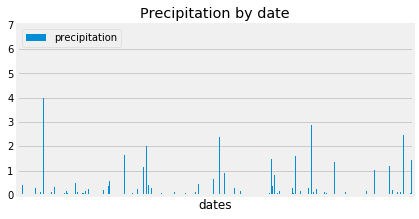

In [16]:
#Create bar graph from collected data representing amount of precipt on dates from 08/2016
#Title graph "Precipitation by date", layout is tight type, 
# Use Pandas Plotting with Matplotlib to plot the data
df.iloc[::-1].plot.bar(title="Precipitation by date")
plt.tight_layout()
plt.xticks([])
plt.show()




In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# run this function to do the common analysis data output


df.precipitation.describe()



count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

In [16]:
# Design a query to show how many stations are available in this dataset?
# Create a query that counts the listed stations names 
#Print a text with count number


#first_row1 = session.query(Station).first()
#first_row1.__dict__

unique_stations = session.query(Station.station).distinct().count()
print(f"there are {unique_stations} stations in the data set")

there are 9 stations in the data set


In [17]:
first_row1 = session.query(Station).first()
first_row1.__dict__


#explore_table = session.query(Measurement).first()
#explore_table.__dict__
# read first row of measurements table and print data from first rom=w in dictionary format

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2770d5d7b70>,
 'id': 1,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
#Group measurement data row by measurement station name and count how many rows each seperate station has.
# PUt the name and count into a dataframe
#Print dataframe
#sort the dataframe by decending count values
    
results2 = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all()

df2 = pd.DataFrame(results2, columns=['Station', 'count'])
#df2.set_index('dates', inplace=True, )
df2.head(10)


df2.sort_values(by='count', ascending=False)
    



,Station,count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [115]:
#can also use stations = df2.Station.tolist()
stations = ["USC00519281", "USC00519397", "USC00513117", "USC00519523", "USC00516128", "USC00514830", "USC00511918", "USC00517948", "USC00518838"]

In [11]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').group_by(Measurement.station).all()

#query stated station for lowest temperature data number, highest tempature data number, and the average tempature of all the tempature data of the specified station
#specified station USC00519281 the one with the most number of records
#print list of numbers found


[(54.0, 85.0, 71.66378066378067)]

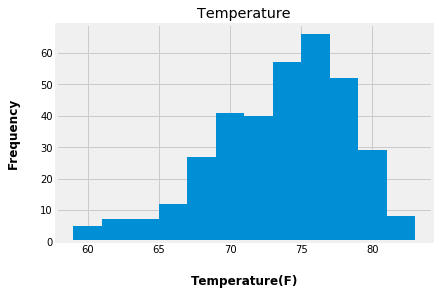

In [56]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#temp_obv = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).all()
#temp_obv


station_temps = session.query(Measurement.tobs).\
    filter(Measurement.date > '2016-08-23').\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.date).all()

dftemps = pd.DataFrame(station_temps, columns=['Temperature'])
#df2.set_index('dates', inplace=True, )
dftemps.head(10)


dftemps.sort_values(by='Temperature', ascending=False)
ax = dftemps.hist(bins=12)
ax = ax[0]
for x in ax:
    x.set_xlabel("Temperature(F)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

#ax.set_xlabel("Frequency")
#ax.set_ylabel("Temperature(F)"
# this group does exactly in tandem of instructions
#with a couple of appearance flourishes of the graph
                  


